In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [3]:
df = pd.read_csv('airbnb_listing_train.csv')


In [4]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,price
0,11602914,Luxury home 100m2+garden in center!,3123809,Marjolein,NaN,De Pijp - Rivierenbuurt,52.35368,4.90177,Entire home/apt,3,13,15-02-2020,0.27,1,0,220
1,13289321,East is where your home is!,10259430,Ana,NaN,Oud-Oost,52.35728,4.92052,Entire home/apt,4,14,19-06-2019,0.29,1,0,110
2,40779315,Amsterdam Central - LUXURY house in BUSY STREET,224969266,Mark,NaN,Centrum-West,52.37582,4.89850,Entire home/apt,2,9,16-03-2020,1.65,1,7,100
3,7820311,great appartment down town,693472,Ayden,NaN,Westerpark,52.37792,4.87300,Entire home/apt,3,42,17-02-2020,0.72,1,0,130
4,27346603,Private room with canal view in peaceful area,41888346,Alissa,NaN,Westerpark,52.38051,4.87493,Private room,2,89,26-02-2020,4.02,1,24,90


In [5]:
df.shape

(12901, 16)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12901 entries, 0 to 12900
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              12901 non-null  int64  
 1   name                            12879 non-null  object 
 2   host_id                         12901 non-null  int64  
 3   host_name                       12893 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   12901 non-null  object 
 6   latitude                        12901 non-null  float64
 7   longitude                       12901 non-null  float64
 8   room_type                       12901 non-null  object 
 9   minimum_nights                  12901 non-null  int64  
 10  number_of_reviews               12901 non-null  int64  
 11  last_review                     11305 non-null  object 
 12  reviews_per_month               

In [7]:
df.describe()

,id,host_id,neighbourhood_group,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,price
count,1.290100e+04,1.290100e+04,0.0,12901.000000,12901.000000,12901.000000,12901.000000,11305.000000,12901.000000,12901.000000,12901.000000
mean,1.984923e+07,6.321700e+07,NaN,52.365313,4.889744,3.542516,24.803194,0.748501,2.136501,61.392295,166.959538
std,1.216241e+07,8.010814e+07,NaN,0.016418,0.036016,15.154077,53.406134,1.260791,6.001838,107.988329,234.794630
min,2.016800e+04,3.592000e+03,NaN,52.289270,4.755720,1.000000,0.000000,0.010000,1.000000,0.000000,6.000000
25%,9.869642e+06,8.948269e+06,NaN,52.355190,4.863950,2.000000,2.000000,0.180000,1.000000,0.000000,99.000000
50%,1.874939e+07,2.711601e+07,NaN,52.364570,4.887130,2.000000,9.000000,0.380000,1.000000,0.000000,135.000000
75%,2.914232e+07,8.337686e+07,NaN,52.375110,4.909310,3.000000,24.000000,0.770000,1.000000,87.000000,190.000000
max,4.370900e+07,3.490175e+08,NaN,52.425090,5.018400,1001.000000,843.000000,50.000000,78.000000,365.000000,9000.000000


In [8]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365', 'price'],
      dtype='object')

In [9]:
df.isnull().sum()

id                                    0
name                                 22
host_id                               0
host_name                             8
neighbourhood_group               12901
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
minimum_nights                        0
number_of_reviews                     0
last_review                        1596
reviews_per_month                  1596
calculated_host_listings_count        0
availability_365                      0
price                                 0
dtype: int64

In [10]:
df.nunique()

id                                12901
name                              12653
host_id                           11601
host_name                          4536
neighbourhood_group                   0
neighbourhood                        22
latitude                           5227
longitude                          7887
room_type                             4
minimum_nights                       56
number_of_reviews                   362
last_review                        1495
reviews_per_month                   610
calculated_host_listings_count       26
availability_365                    366
price                               400
dtype: int64

In [11]:
df.drop(['name','host_name','neighbourhood_group'], axis=1, inplace =True)

In [12]:
df.drop(['last_review','reviews_per_month'], axis=1, inplace =True)

In [13]:
df['neighbourhood'] = df['neighbourhood'].astype('category')

In [14]:
df['neighbourhood'] = df['neighbourhood'].cat.codes

In [15]:
df['neighbourhood'].value_counts()

7     2209
8     1600
5     1429
4     1097
20     958
21     924
17     831
2      730
14     644
19     381
16     376
11     321
18     269
13     257
12     171
3      155
10     144
6       88
15      83
9       80
0       78
1       76
Name: neighbourhood, dtype: int64

In [16]:
df['room_type'].value_counts()

Entire home/apt    10064
Private room        2622
Hotel room           174
Shared room           41
Name: room_type, dtype: int64

In [17]:
df = pd.get_dummies(df, columns=['room_type'])


In [18]:
df.head()

,id,host_id,neighbourhood,latitude,longitude,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,price,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,11602914,3123809,8,52.35368,4.90177,3,13,1,0,220,1,0,0,0
1,13289321,10259430,17,52.35728,4.92052,4,14,1,0,110,1,0,0,0
2,40779315,224969266,5,52.37582,4.89850,2,9,1,7,100,1,0,0,0
3,7820311,693472,20,52.37792,4.87300,3,42,1,0,130,1,0,0,0
4,27346603,41888346,20,52.38051,4.87493,2,89,1,24,90,0,0,1,0


In [19]:
df.dtypes

id                                  int64
host_id                             int64
neighbourhood                        int8
latitude                          float64
longitude                         float64
minimum_nights                      int64
number_of_reviews                   int64
calculated_host_listings_count      int64
availability_365                    int64
price                               int64
room_type_Entire home/apt           uint8
room_type_Hotel room                uint8
room_type_Private room              uint8
room_type_Shared room               uint8
dtype: object

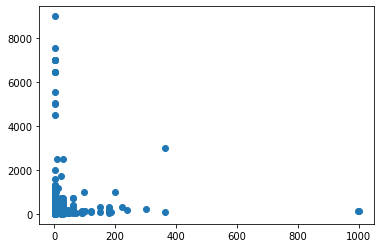

In [20]:
plt.scatter(df.minimum_nights,df.price)

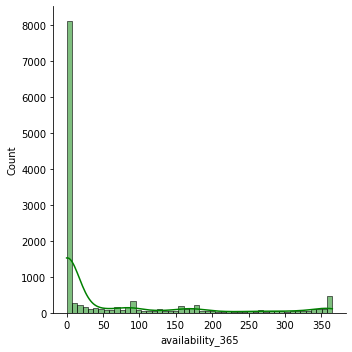

In [21]:
sns.displot(df['availability_365'],kde = True,color = "g" )

<Figure size 1080x360 with 0 Axes>

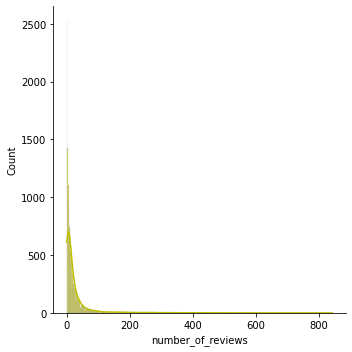

In [49]:
plt.figure(figsize=(15,5))
sns.displot(df['number_of_reviews'],kde = True,color = "y" )

<AxesSubplot:>

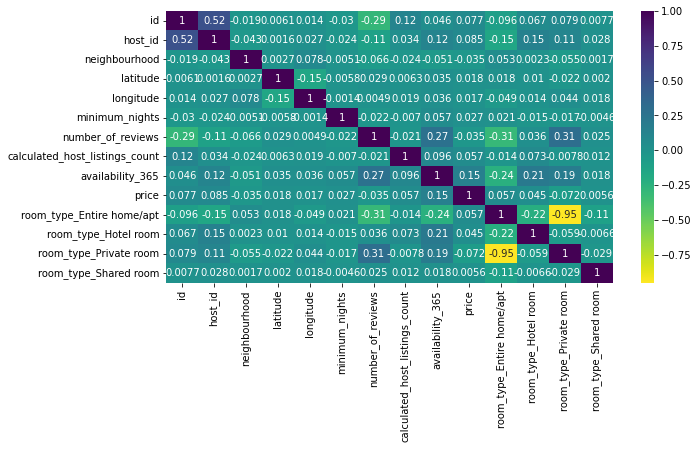

In [41]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot = True,cmap=plt.cm.get_cmap('viridis_r'))

<AxesSubplot:xlabel='room_type_Hotel room', ylabel='price'>

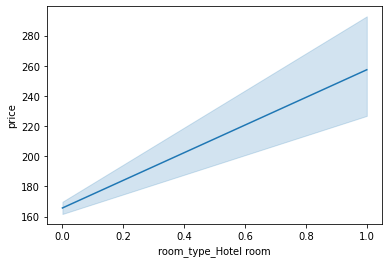

In [27]:
sns.lineplot(x = df["room_type_Hotel room"], y = df["price"])

In [28]:
X = df.drop('price', axis = 1)
y = df['price']

In [29]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=5)

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
reg = LinearRegression()

In [33]:
reg.fit(X_train,y_train)

LinearRegression()

In [34]:
reg.score(X_test,y_test)

0.05806683722654571

In [38]:
!pip install catboost

You should consider upgrading via the 'C:\Users\Sachin\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [39]:
from catboost import CatBoostRegressor
from sklearn.model_selection import GridSearchCV

In [42]:
model = CatBoostRegressor(random_seed = 42 )
parameters = {'depth'         : [6,8,10,21],
                  'learning_rate' : [0.01, 0.05, 0.1],
                  'iterations'    : [30, 50, 100]
              }
grid = GridSearchCV(estimator=model, param_grid = parameters, cv = 2, n_jobs=-1)
grid.fit(X_train, y_train)

C:\Users\Sachin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
18 fits failed out of a total of 72.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
18 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Sachin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Sachin\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py", line 5504, in fit
    return self._fit(X, y, cat_features, None, None, None, sample_weight, None, None, None, None, baseline,
  File "C:\Users\Sach

0:	learn: 244.6989545	total: 850ms	remaining: 1m 24s
1:	learn: 240.3644578	total: 1.33s	remaining: 1m 5s
2:	learn: 236.0559295	total: 1.61s	remaining: 52.1s
3:	learn: 232.2016390	total: 1.9s	remaining: 45.5s
4:	learn: 228.1956579	total: 2.12s	remaining: 40.3s
5:	learn: 224.9237474	total: 2.38s	remaining: 37.3s
6:	learn: 221.8833684	total: 2.66s	remaining: 35.4s
7:	learn: 219.3503067	total: 2.97s	remaining: 34.2s
8:	learn: 216.4718446	total: 3.22s	remaining: 32.5s
9:	learn: 213.6216524	total: 3.55s	remaining: 31.9s
10:	learn: 211.1899130	total: 3.98s	remaining: 32.2s
11:	learn: 208.6967289	total: 4.25s	remaining: 31.2s
12:	learn: 206.1304365	total: 4.54s	remaining: 30.4s
13:	learn: 203.7442569	total: 4.76s	remaining: 29.2s
14:	learn: 201.2946610	total: 5.07s	remaining: 28.7s
15:	learn: 198.9729070	total: 5.39s	remaining: 28.3s
16:	learn: 196.9597111	total: 5.73s	remaining: 28s
17:	learn: 195.0154714	total: 6.14s	remaining: 28s
18:	learn: 193.1276459	total: 6.51s	remaining: 27.8s
19:	lea

GridSearchCV(cv=2,
             estimator=<catboost.core.CatBoostRegressor object at 0x000001FC0CA23F70>,
             n_jobs=-1,
             param_grid={'depth': [6, 8, 10, 21], 'iterations': [30, 50, 100],
                         'learning_rate': [0.01, 0.05, 0.1]})

In [43]:
pred = grid.predict(X_test)

In [44]:
grid.score(X_test, y_test)

0.1128980935090107

In [45]:
r2_score(y_test, pred)

0.1128980935090107

In [46]:
print(mean_absolute_error(y_test, pred), end='\n')

print(mean_squared_error(y_test, pred), end='\n')

print(np.sqrt(mean_squared_error(y_test, pred)))

61.760897280787184
24049.236019646887
155.0781610016281
